<a href="https://colab.research.google.com/github/Tommy840602/AdaBoost-/blob/main/AdaBoost_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder

In [13]:
train_df = pd.read_csv("/content/train.csv")

In [14]:
train_df.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0   0     L50096    L                300.6                    309.6   
1   1     M20343    M                302.6                    312.1   
2   2     L49454    L                299.3                    308.5   
3   3     L53355    L                301.0                    310.9   
4   4     M24050    M                298.0                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1596         36.1              140                0    0   
1                    1759         29.1              200                0    0   
2                    1805         26.5               25                0    0   
3                    1524         44.3              197                0    0   
4                    1641         35.4               34                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [15]:
train_df = train_df.drop(['id','Product ID'], axis=1)

In [16]:
#EDA
duplicate_rows_data = train_df[train_df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (1156, 12)


In [17]:
train_df= train_df.drop_duplicates()

In [18]:
print("\nData types of each column:")
print(train_df.dtypes)


Data types of each column:
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


In [19]:
for column in train_df.columns:
    num_distinct_values = len(train_df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Type: 3 distinct values
Air temperature [K]: 95 distinct values
Process temperature [K]: 81 distinct values
Rotational speed [rpm]: 952 distinct values
Torque [Nm]: 611 distinct values
Tool wear [min]: 246 distinct values
Machine failure: 2 distinct values
TWF: 2 distinct values
HDF: 2 distinct values
PWF: 2 distinct values
OSF: 2 distinct values
RNF: 2 distinct values


In [21]:
print("\nMissing values in each column:")
print(train_df.isnull().sum())


Missing values in each column:
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


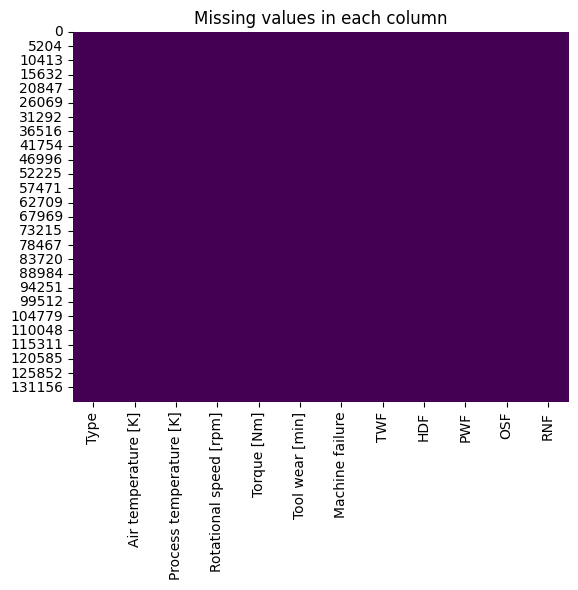

In [23]:
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in each column')
plt.show()

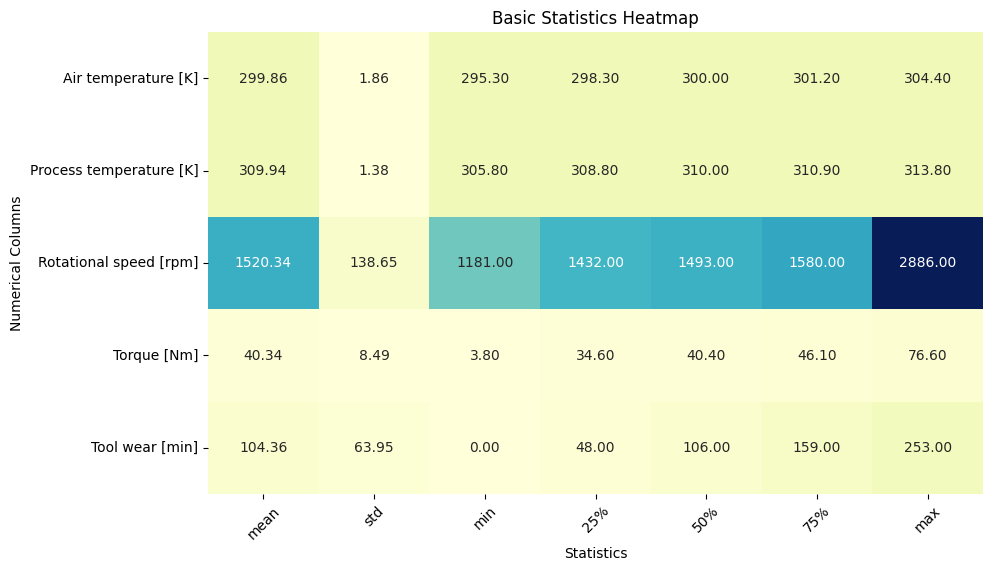

In [24]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Calculate basic statistics
statistics = train_df[numerical_columns].describe().transpose()

# Remove the "count" row from the statistics table
statistics = statistics.drop('count', axis=1)

# Plot the statistics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(statistics, annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title("Basic Statistics Heatmap")
plt.xlabel("Statistics")
plt.ylabel("Numerical Columns")
plt.xticks(rotation=45)
plt.show()

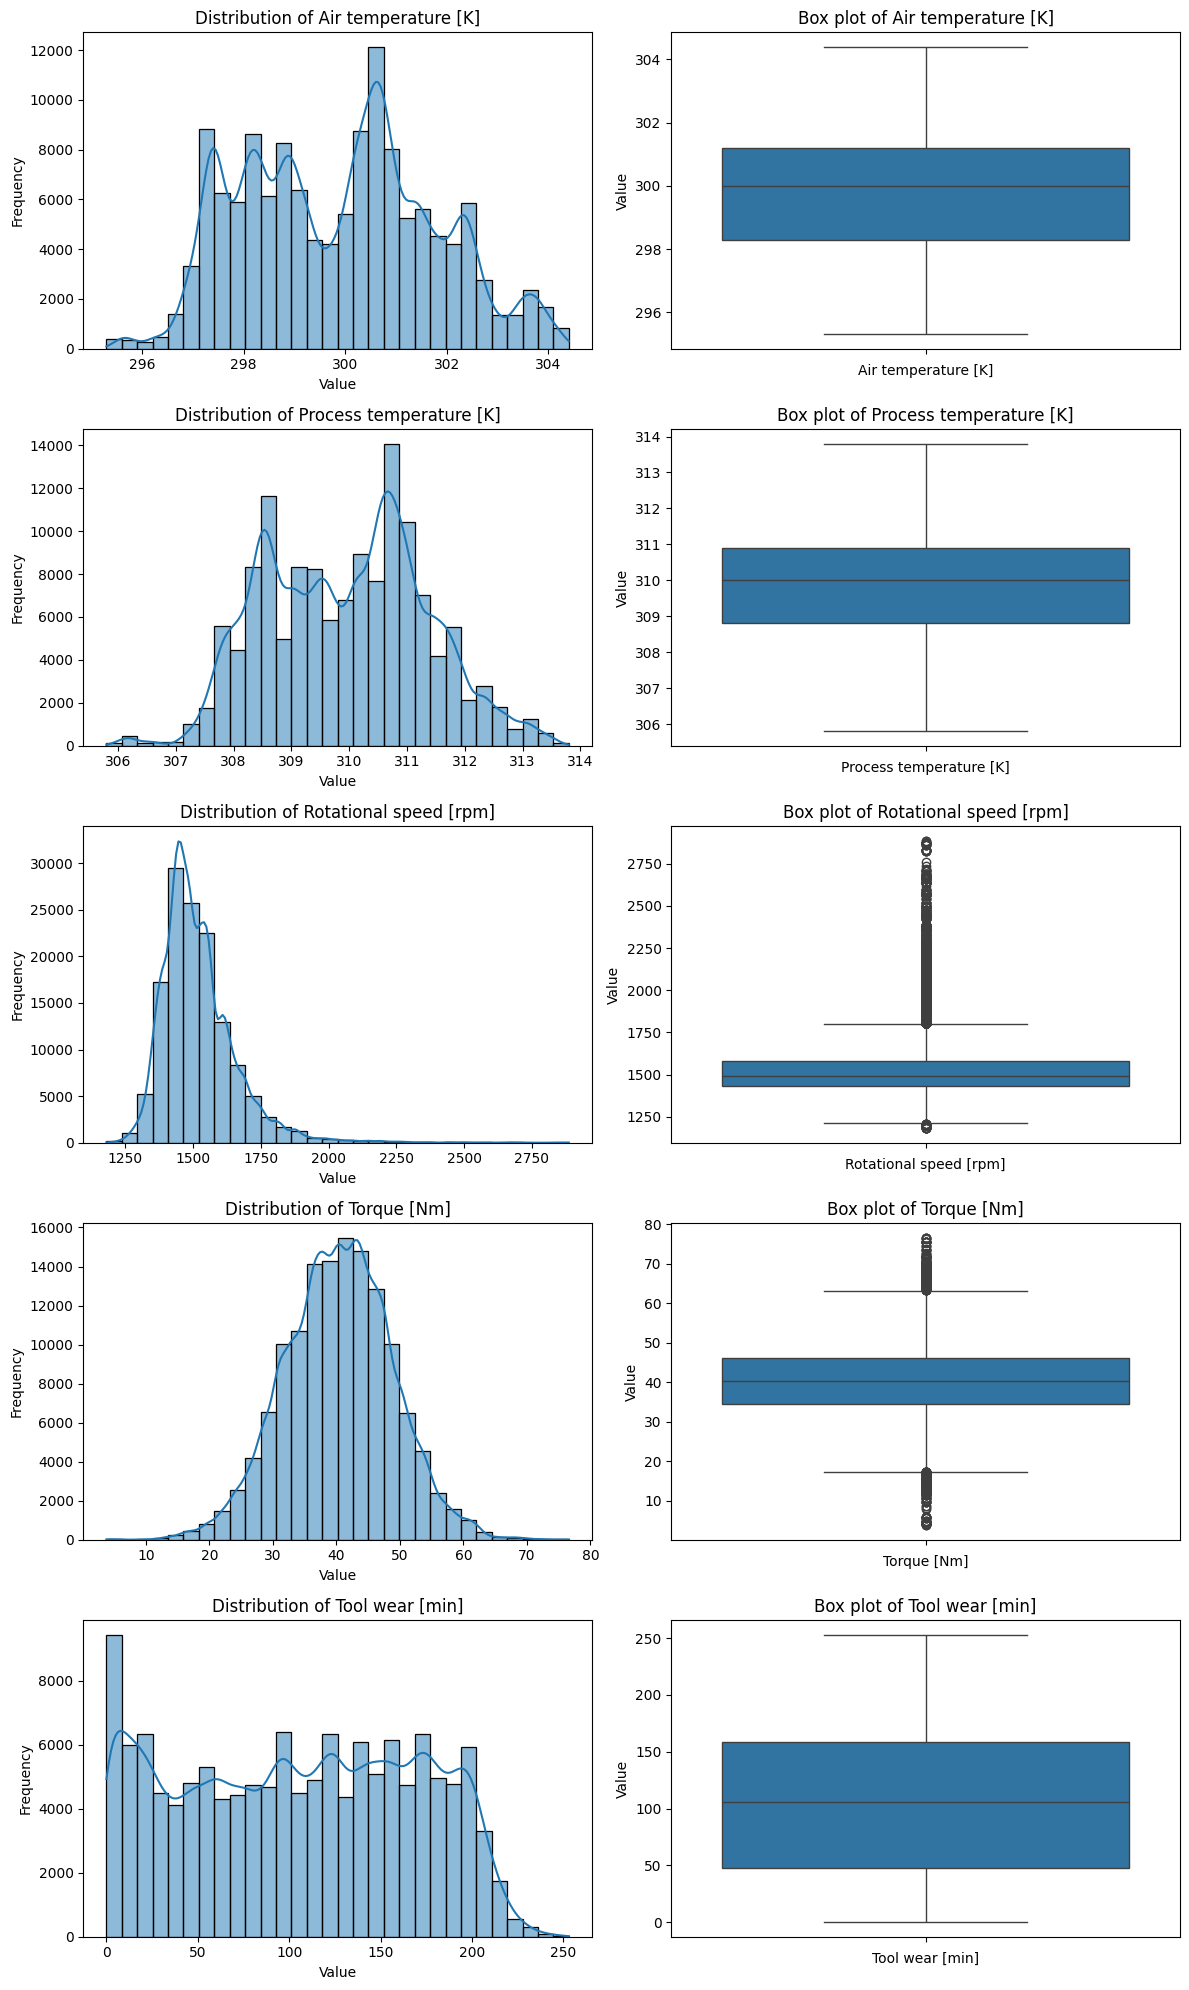

In [25]:
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 20))

for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(train_df[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(train_df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box plot of {column}')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

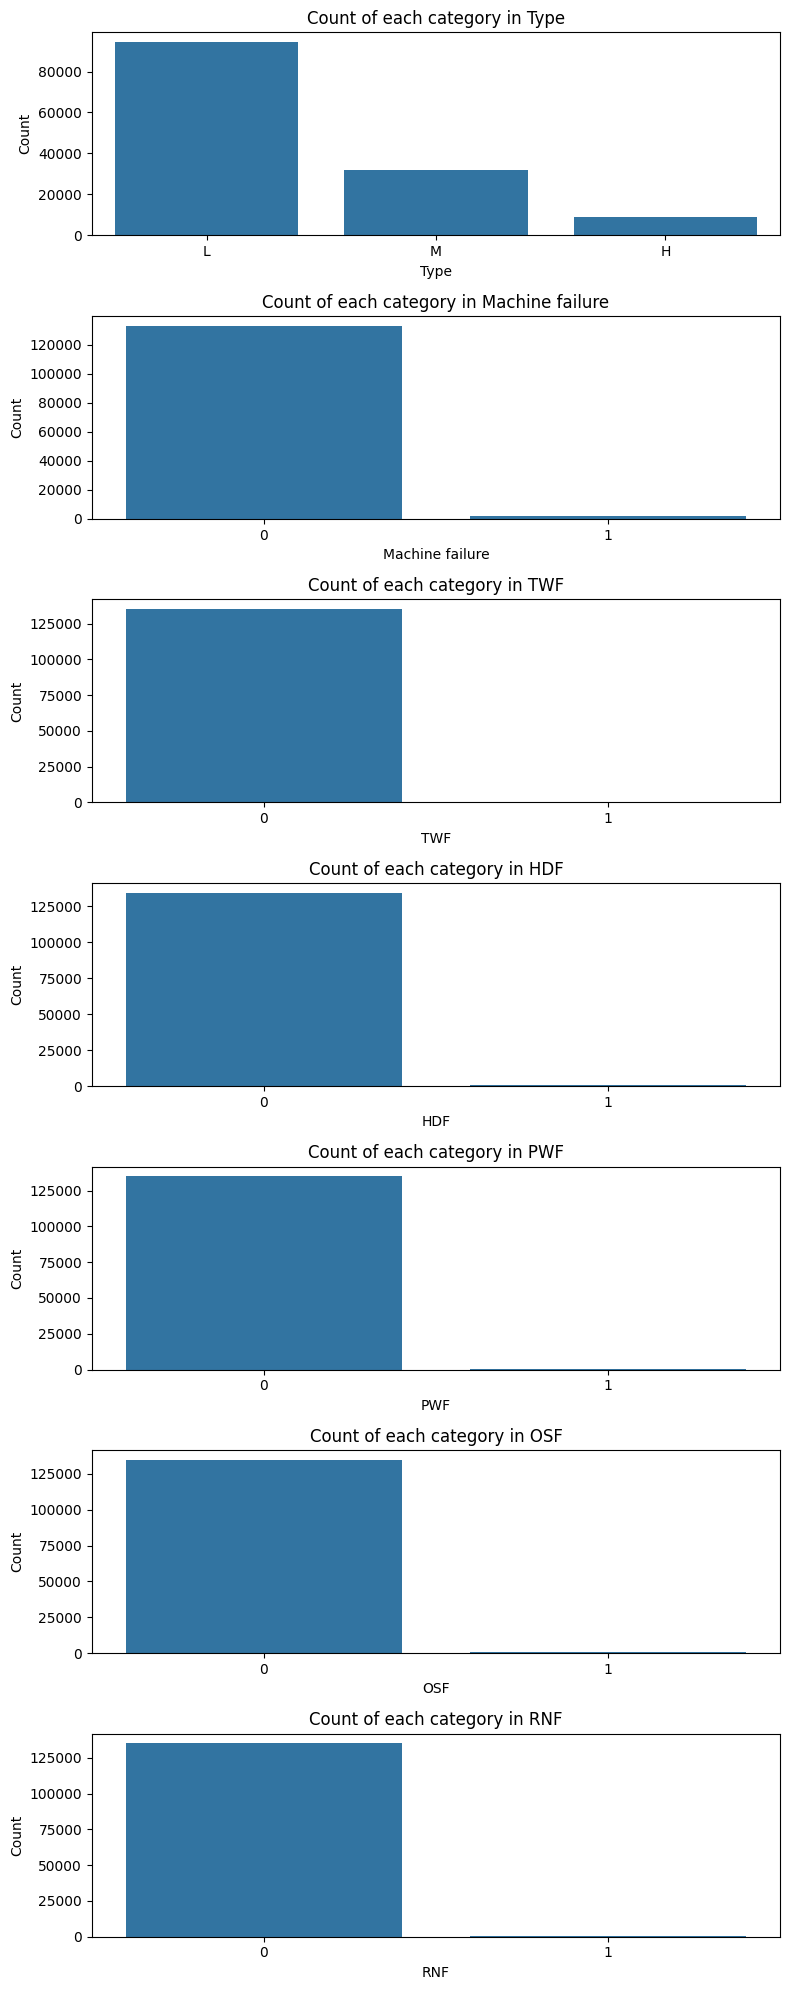

In [26]:
categorical_columns = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(8, 20))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(f'Count of each category in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

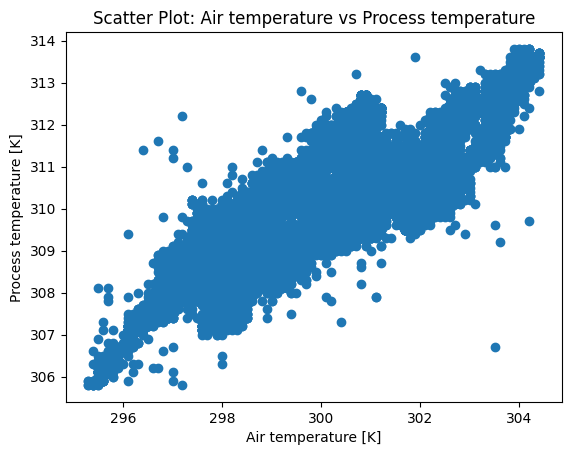

In [27]:
plt.scatter(train_df['Air temperature [K]'], train_df['Process temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.title('Scatter Plot: Air temperature vs Process temperature')
plt.show()

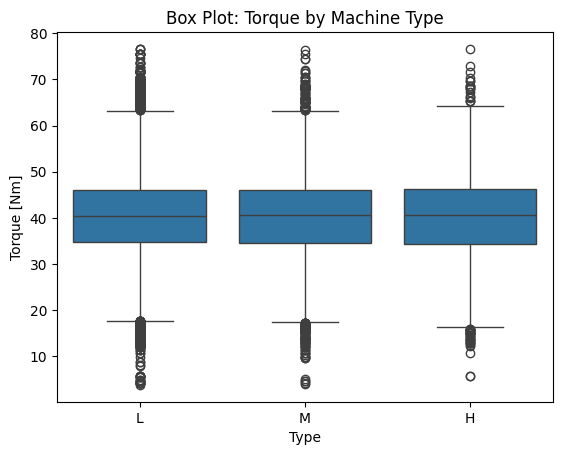

In [28]:
sns.boxplot(x='Type', y='Torque [Nm]', data=train_df)
plt.xlabel('Type')
plt.ylabel('Torque [Nm]')
plt.title('Box Plot: Torque by Machine Type')
plt.show()

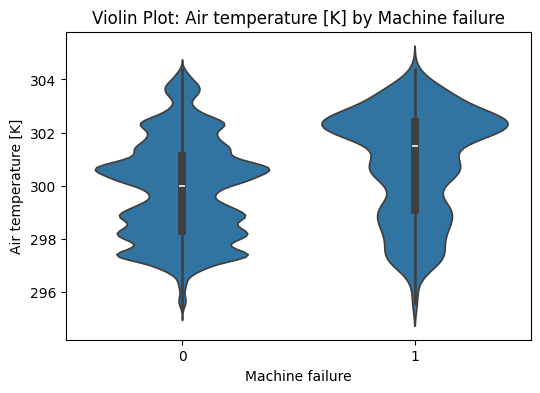

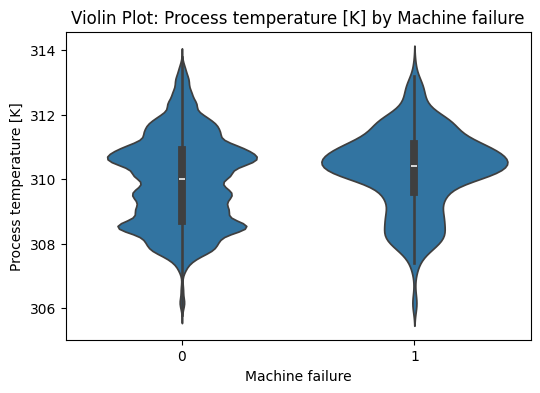

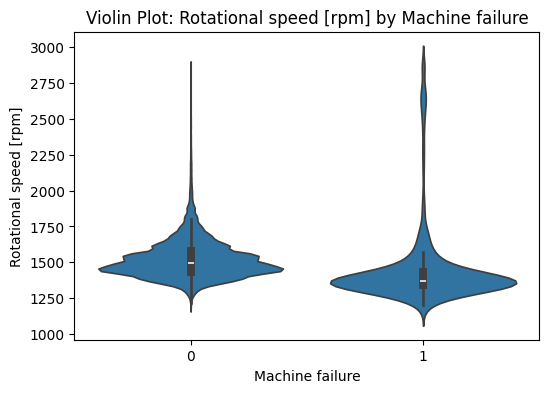

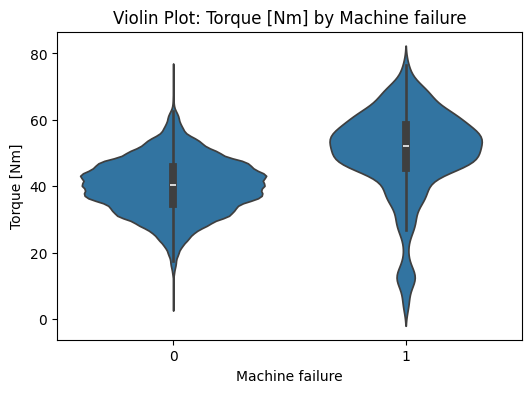

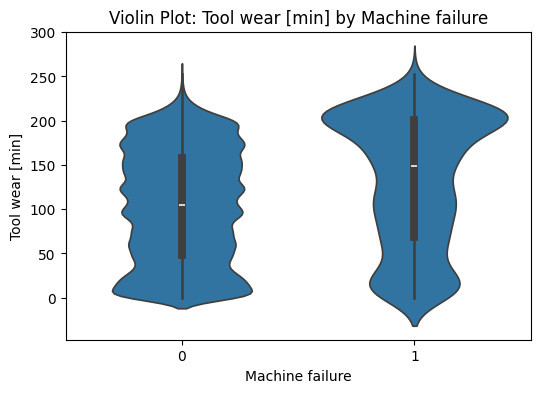

In [29]:
numerical_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Machine failure', y=var, data=train_df)
    plt.xlabel('Machine failure')
    plt.ylabel(var)
    plt.title(f'Violin Plot: {var} by Machine failure')
    plt.show()

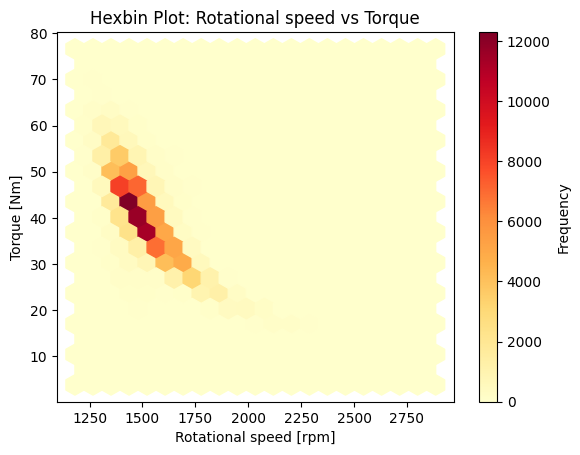

In [30]:
plt.hexbin(train_df['Rotational speed [rpm]'], train_df['Torque [Nm]'], gridsize=20, cmap='YlOrRd')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Hexbin Plot: Rotational speed vs Torque')
plt.colorbar(label='Frequency')
plt.show()

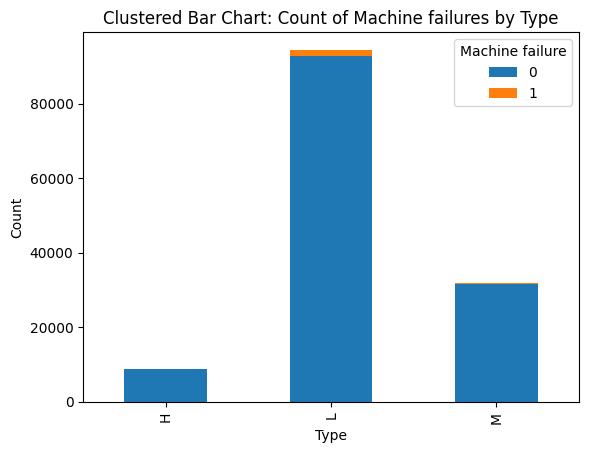

In [31]:
train_df.groupby(['Type', 'Machine failure']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Clustered Bar Chart: Count of Machine failures by Type')
plt.show()

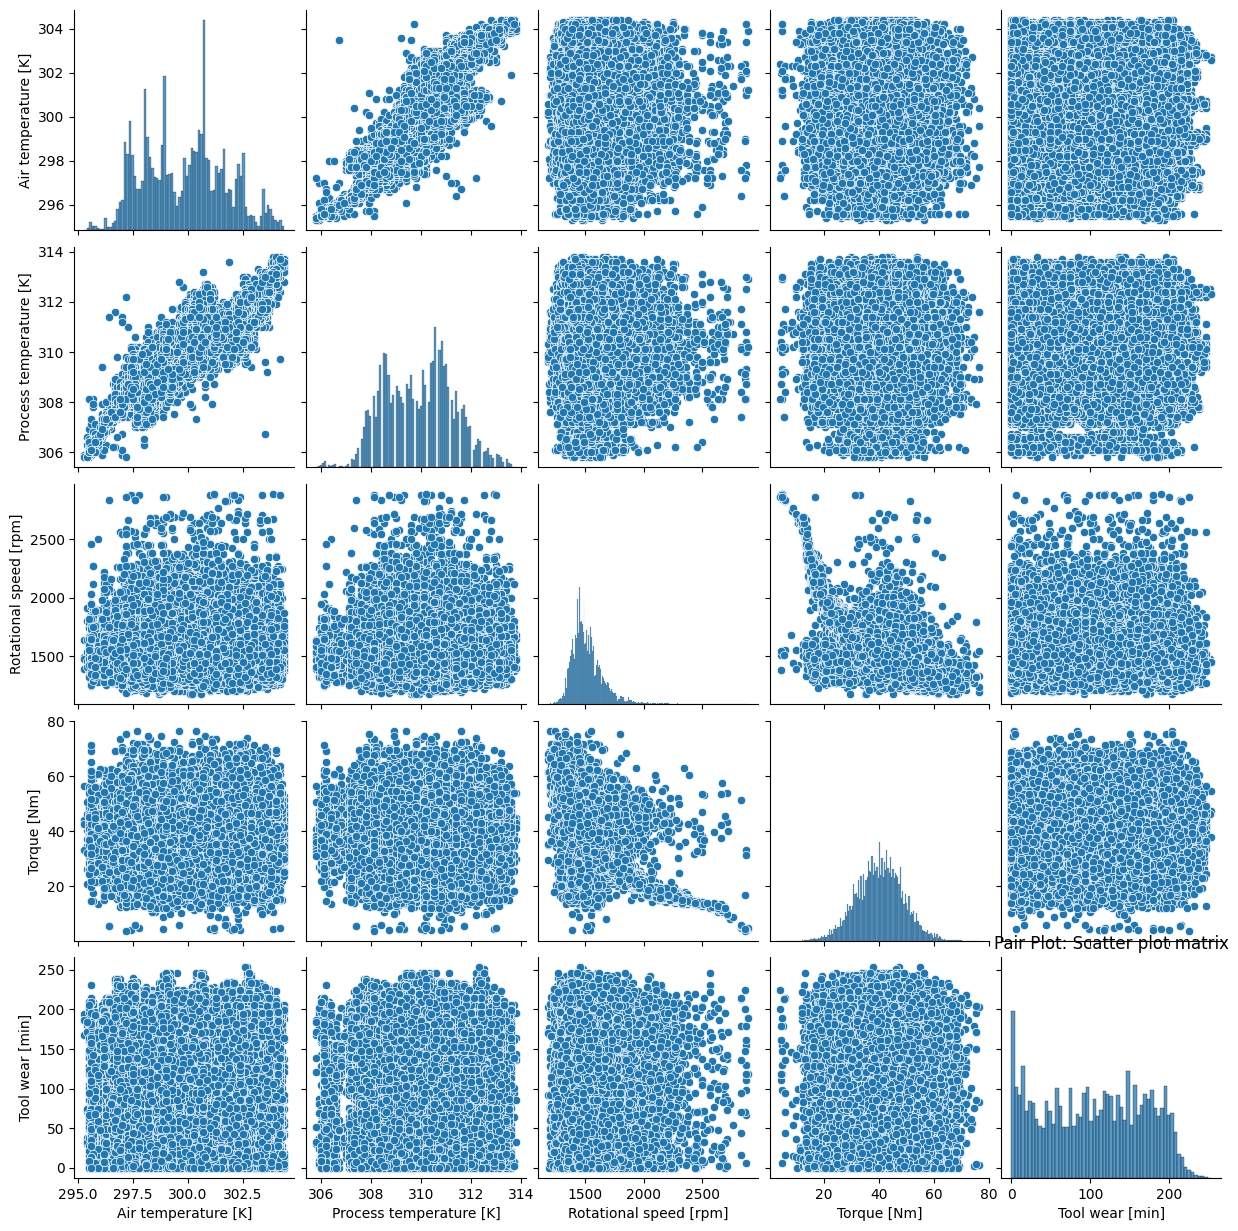

In [34]:
sns.pairplot(train_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])
plt.title('Pair Plot: Scatter plot matrix')
plt.show()

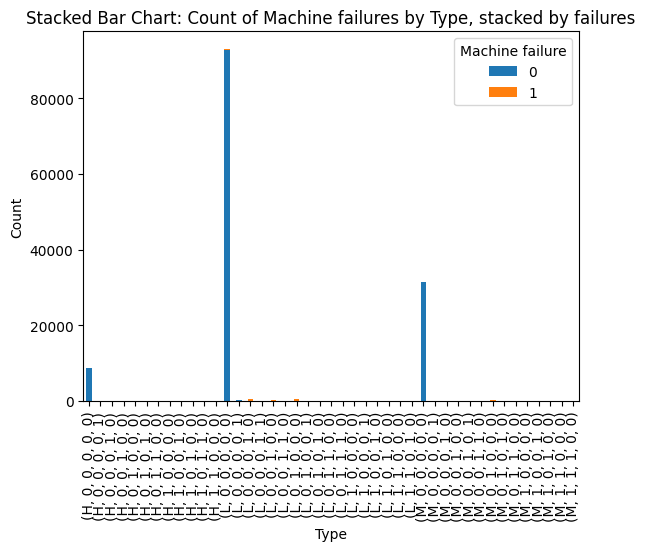

In [35]:
train_df.groupby(['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Count of Machine failures by Type, stacked by failures')
plt.show()

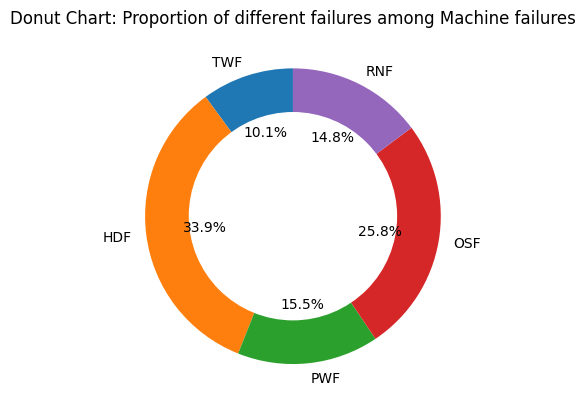

In [36]:
failure_counts = train_df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', startangle=90)
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Donut Chart: Proportion of different failures among Machine failures')
plt.show()

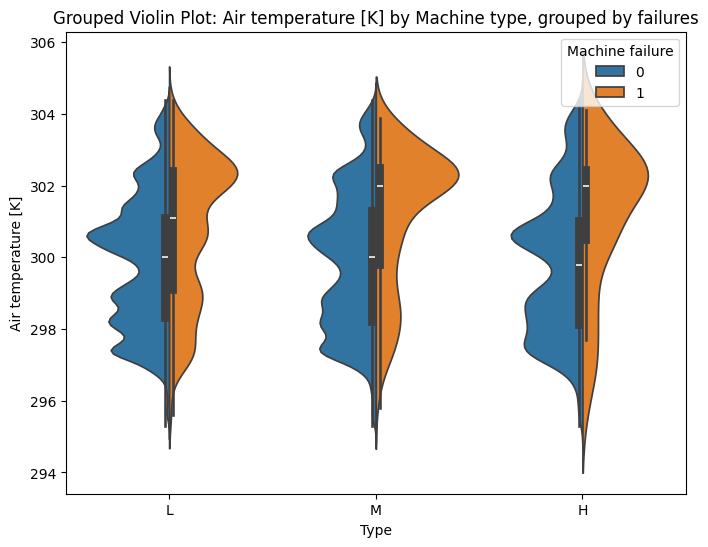

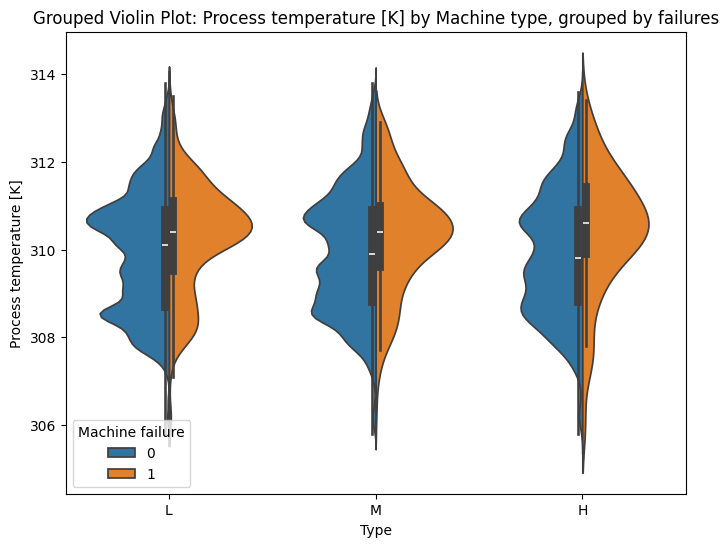

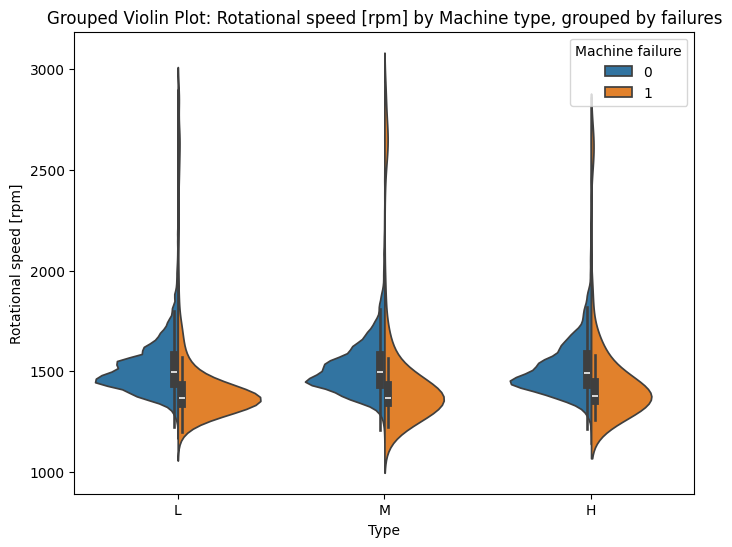

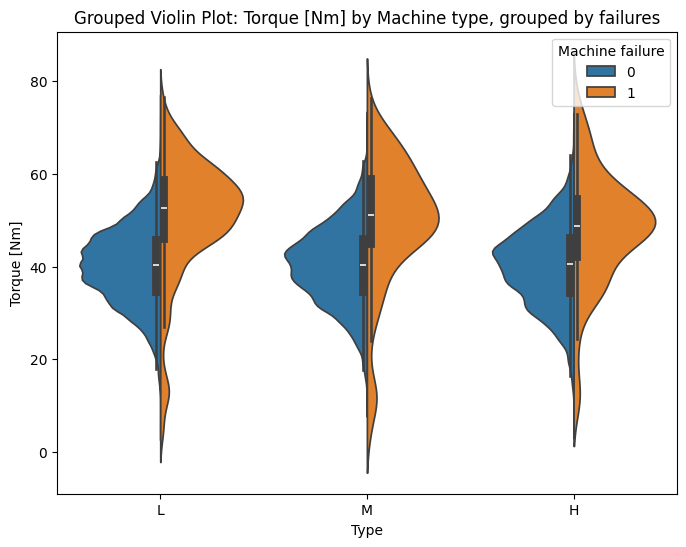

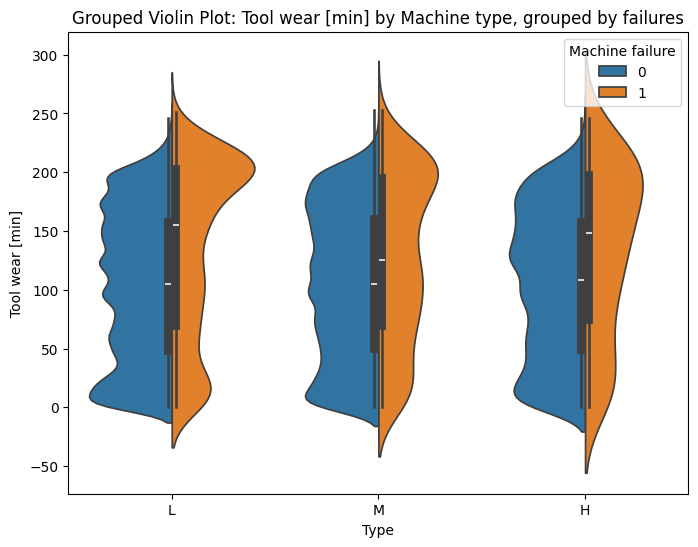

In [38]:
numerical_vars = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Type', y=var, hue='Machine failure', split=True, data=train_df)
    plt.xlabel('Type')
    plt.ylabel(var)
    plt.title(f'Grouped Violin Plot: {var} by Machine type, grouped by failures')
    plt.show()

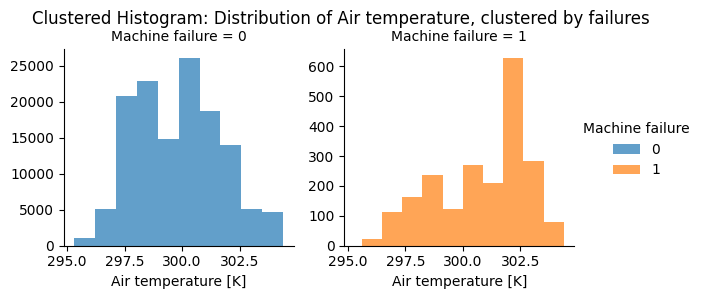

In [39]:
g = sns.FacetGrid(train_df, col='Machine failure', hue='Machine failure', sharey=False)
g.map(plt.hist, 'Air temperature [K]', alpha=0.7)
g.add_legend()
g.fig.suptitle('Clustered Histogram: Distribution of Air temperature, clustered by failures')
plt.subplots_adjust(top=0.85)
plt.show()

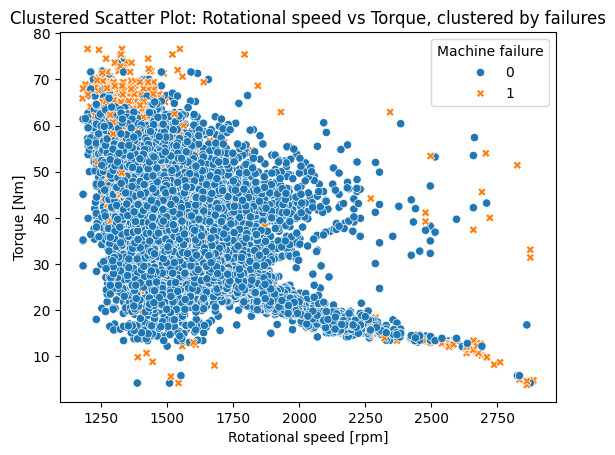

In [40]:
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', style='Machine failure', data=train_df)
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.title('Clustered Scatter Plot: Rotational speed vs Torque, clustered by failures')
plt.show()

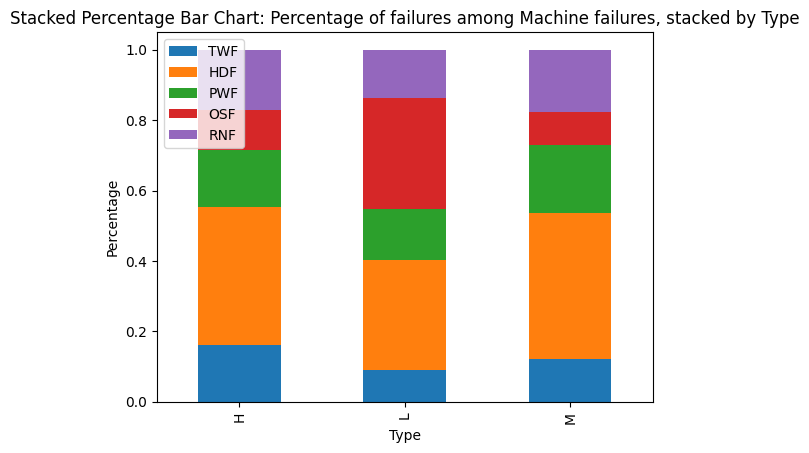

In [41]:
failure_counts_by_type = train_df.groupby('Type')[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
failure_counts_by_type.div(failure_counts_by_type.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Stacked Percentage Bar Chart: Percentage of failures among Machine failures, stacked by Type')
plt.show()

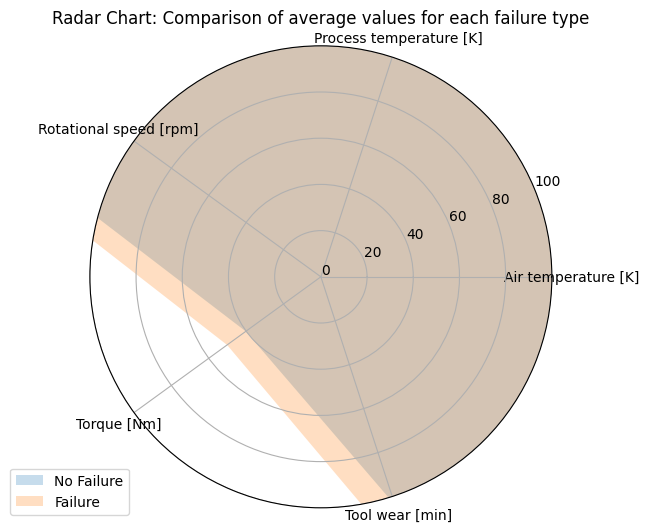

In [42]:
avg_values = train_df.groupby('Machine failure')[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].mean().reset_index()
labels = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, avg_values.iloc[0, 1:].tolist() + avg_values.iloc[0, 1:2].tolist(), alpha=0.25, label='No Failure')
ax.fill(angles, avg_values.iloc[1, 1:].tolist() + avg_values.iloc[1, 1:2].tolist(), alpha=0.25, label='Failure')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_ylim(0, 100)
ax.set_title('Radar Chart: Comparison of average values for each failure type')

ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

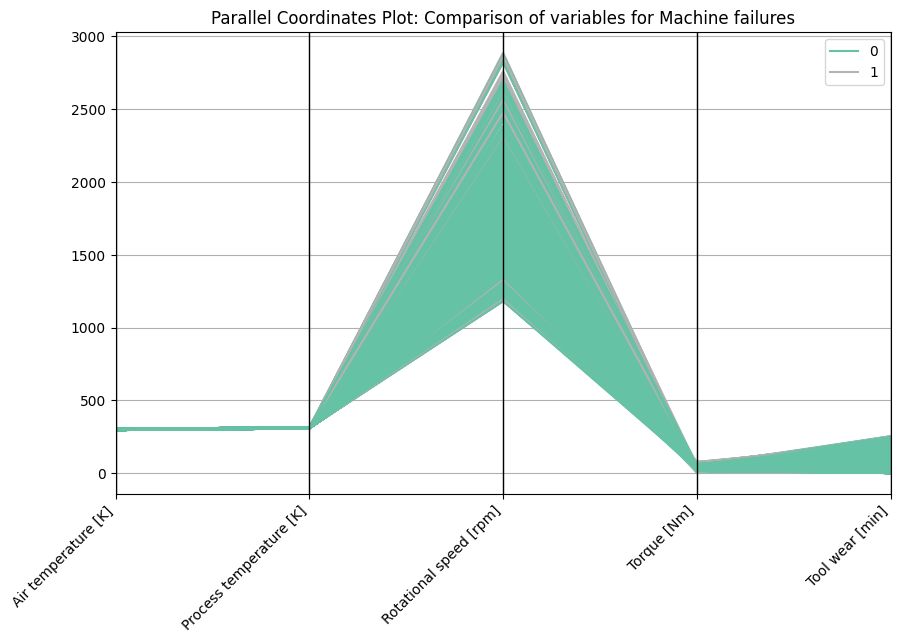

In [43]:
plt.figure(figsize=(10, 6))
parallel_coordinates(train_df[['Machine failure', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']], 'Machine failure', colormap='Set2')

plt.xticks(rotation=45, ha='right')
plt.title('Parallel Coordinates Plot: Comparison of variables for Machine failures')
plt.show()

In [44]:
#CORRELATION MATRIX
categorical_columns = ['Type']
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','TWF', 'HDF', 'PWF', 'OSF', 'RNF','Machine failure']
dummy_variables = pd.get_dummies(train_df, columns=categorical_columns, drop_first=False)

In [45]:
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(train_df[numerical_columns])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [46]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)
processed_df = pd.concat([dummy_variables, scaled_numerical_df],axis=1)

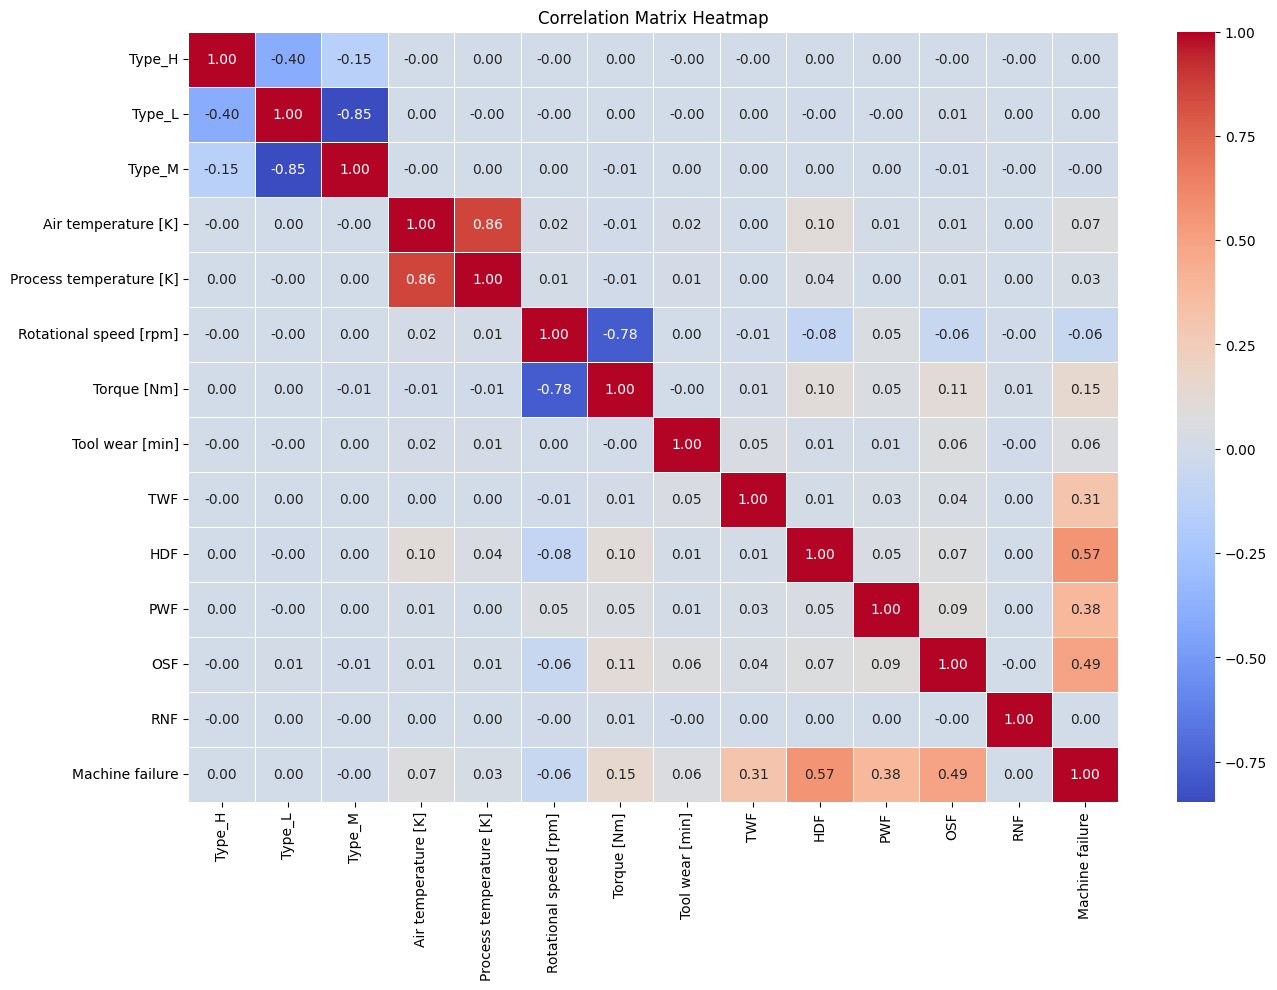

In [47]:
correlation_matrix = processed_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

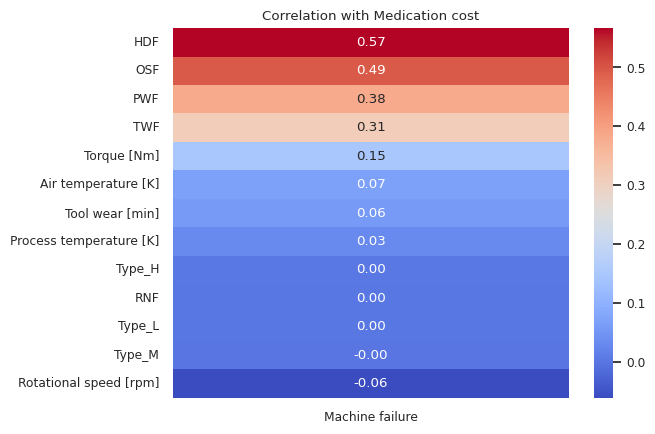

In [48]:
corr = processed_df.corr()
target_corr = corr['Machine failure'].drop('Machine failure')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

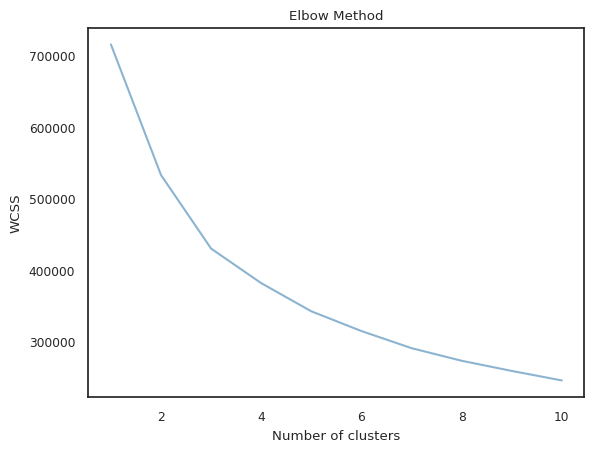

In [51]:
#CLUSTERING ANALYSIS
def preprocess_data(train_df):
    le = LabelEncoder()
    train_df['Type'] = le.fit_transform(train_df['Type'])

    scaler = StandardScaler()
    numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

    return train_df

def determine_optimal_clusters(train_df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(train_df)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

train_df = preprocess_data(train_df)

data_scaled = train_df.drop('Machine failure', axis=1)
determine_optimal_clusters(data_scaled)

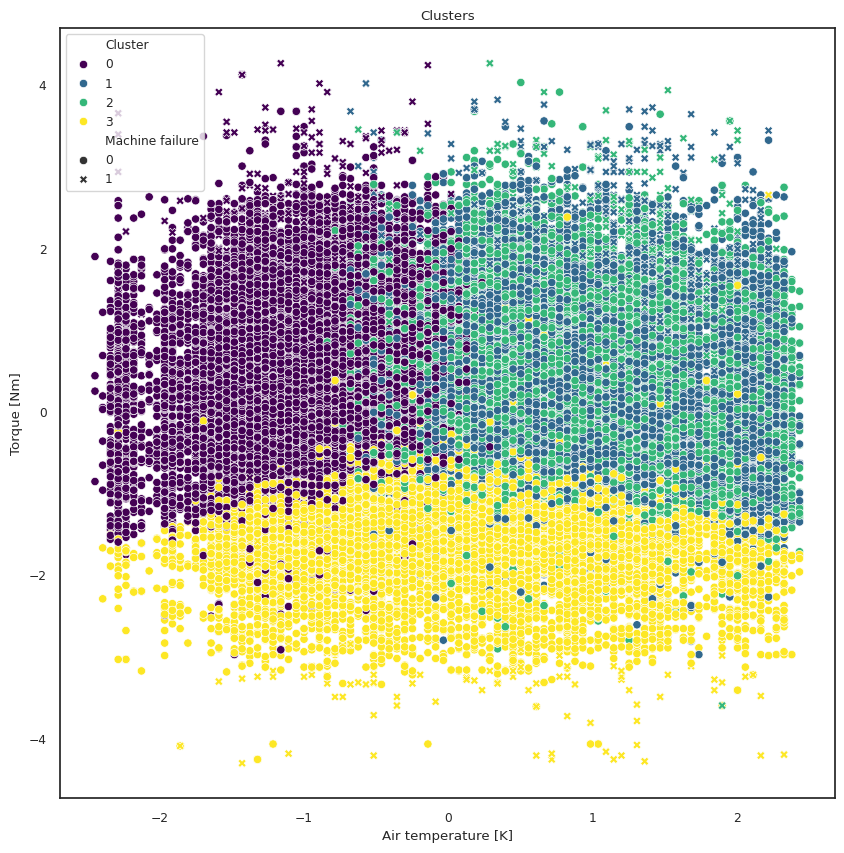

In [52]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

train_df['Cluster'] = clusters

plt.figure(figsize=(10, 10))
sns.scatterplot(data=train_df, x='Air temperature [K]', y='Torque [Nm]', hue='Cluster', style='Machine failure', palette='viridis')
plt.title('Clusters')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.show()

In [53]:
#AdaBoost Classifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, accuracy_score, average_precision_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.utils import resample
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 9.2 MB/s eta 0:00:00


In [54]:
df = pd.read_csv("/content/train.csv")
# Drop 'id' and 'Product ID' columns
df = df.drop(['id', 'Product ID'], axis=1)
df= df.drop_duplicates()

In [55]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])

scaler = StandardScaler()
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [56]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#Hyperparameter Tuning
param_grid = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]}
grid = GridSearchCV(AdaBoostClassifier(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'learning_rate': 0.3, 'n_estimators': 200}


In [58]:
best_learning_rate = 0.3
best_n_estimators = 200
ada = AdaBoostClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=200)

In [59]:
scores = cross_val_score(ada, X, y, cv=10)
print("Cross-validation scores: ", scores)

average_cv_score = np.mean(scores)
print("Average cross-validation score: ", average_cv_score)

y_pred = ada.predict(X_test)
print("Model Accuracy: ", accuracy_score(y_test, y_pred))

Cross-validation scores:  [0.99623004 0.99600828 0.99578652 0.99674725 0.99667332 0.99637762
 0.99608191 0.99630369 0.99630369 0.9951948 ]
Average cross-validation score:  0.9961707102473765
Model Accuracy:  0.9966364812419146


In [60]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26621
           1       1.00      0.79      0.88       434

    accuracy                           1.00     27055
   macro avg       1.00      0.90      0.94     27055
weighted avg       1.00      1.00      1.00     27055



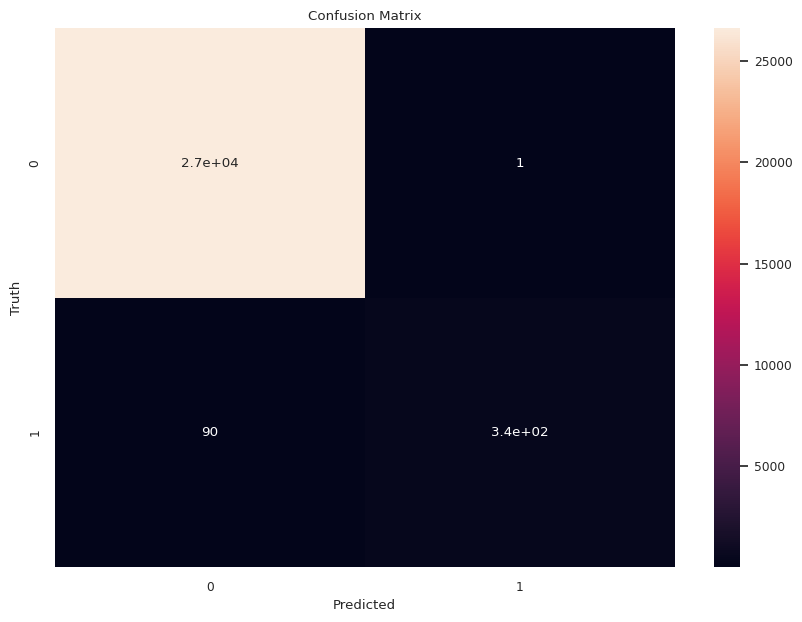

In [61]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

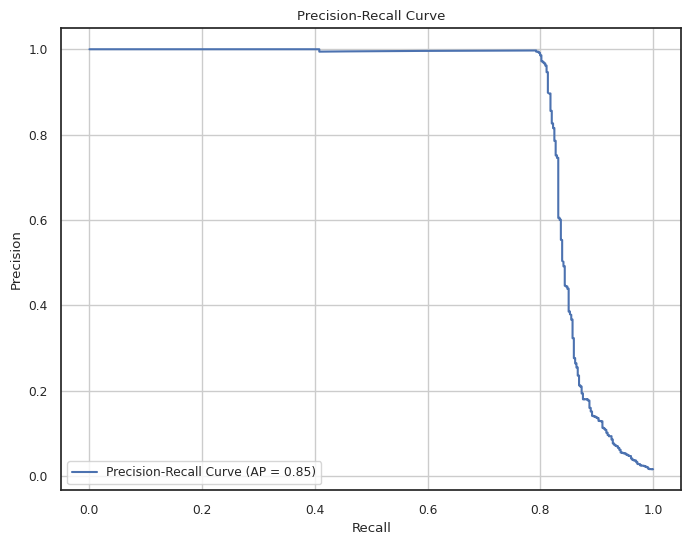

In [62]:
#ROC Curve and AUC Score
probabilities = ada.predict_proba(X_test)
prob_class_1 = probabilities[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, prob_class_1)
average_precision = average_precision_score(y_test, prob_class_1)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision), color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

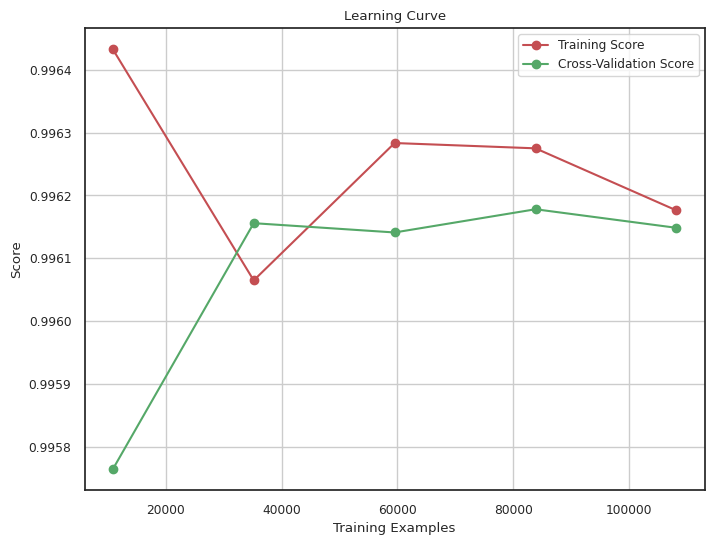

Training Size:    10821    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    35170    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    59519    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:    83868    Training Score: 1.00    Cross-Validation Score: 1.00
Training Size:   108218    Training Score: 1.00    Cross-Validation Score: 1.00


In [64]:
#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(AdaBoostClassifier(**grid.best_params_), X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.grid()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.show()

for i, train_size in enumerate(train_sizes):
    print("Training Size: {:>8}    Training Score: {:.2f}    Cross-Validation Score: {:.2f}".format(
        train_size, train_scores_mean[i], test_scores_mean[i]))

In [65]:
#Error Analysis
error_indices = y_test != y_pred
X_test_errors = X_test[error_indices]
y_test_errors = y_test[error_indices]
y_pred_errors = y_pred[error_indices]
error_count = len(X_test_errors)

print("Error Analysis:")
print("Total Errors: {}".format(error_count))

Error Analysis:
Total Errors: 91


95.0 confidence interval 99.6% and 99.7%


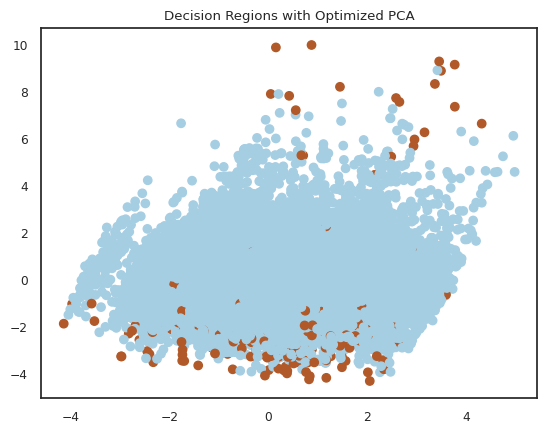

In [66]:
#Decision Region
from sklearn.decomposition import TruncatedSVD
from joblib import Parallel, delayed

n_iterations = 200

def train_predict():
    sample_X, sample_y = resample(X_train, y_train)
    ada.fit(sample_X, sample_y)
    y_pred = ada.predict(X_test)
    return accuracy_score(y_test, y_pred)

n_jobs = -1
accuracy_scores = Parallel(n_jobs=n_jobs)(delayed(train_predict)() for _ in range(n_iterations))

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(accuracy_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(accuracy_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

pca = TruncatedSVD(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

ada_pca = AdaBoostClassifier()
ada_pca.fit(X_train_pca, y_train)

plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('Decision Regions with Optimized PCA')
plt.show()

In [83]:
#MAKING A PREDICTION
test_df = pd.read_csv('/content/test.csv')

In [84]:
test_df.head()

id Product ID Type  Air temperature [K]  Process temperature [K]  \
0  136429     L50896    L                302.3                    311.5   
1  136430     L53866    L                301.7                    311.0   
2  136431     L50498    L                301.3                    310.4   
3  136432     M21232    M                300.1                    309.6   
4  136433     M19751    M                303.4                    312.3   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0                    1499         38.0               60    0    0    0    0   
1                    1713         28.8               17    0    0    0    0   
2                    1525         37.7               96    0    0    0    0   
3                    1479         47.6                5    0    0    0    0   
4                    1515         41.3              114    0    0    0    0   

   RNF  
0    0  
1    0  
2    0  
3    0  
4    0

In [85]:
test_df = test_df.drop('Product ID', axis=1)
test_df['Type'] = le.transform(test_df['Type'])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

id_column = test_df['id']
test_df = test_df.drop('id', axis=1)

In [86]:
predictions = ada.predict(test_df)
submission = pd.DataFrame({'id': id_column, 'Machine failure': predictions})
print(submission)

           id  Machine failure
0      136429                0
1      136430                0
2      136431                0
3      136432                0
4      136433                0
...       ...              ...
90949  227378                0
90950  227379                0
90951  227380                0
90952  227381                0
90953  227382                0

[90954 rows x 2 columns]


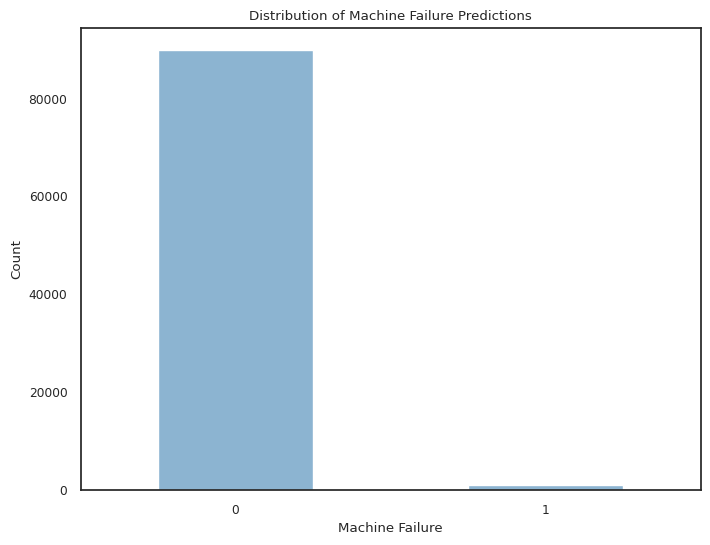

In [87]:
plt.figure(figsize=(8, 6))
submission['Machine failure'].value_counts().plot(kind='bar')
plt.title('Distribution of Machine Failure Predictions')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()